<a href="https://colab.research.google.com/github/ssudhakar0108/latest_projects/blob/main/image_classificatio_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
cd/content/drive/MyDrive/image_classification_updated

/content/drive/MyDrive/image_classification_updated


In [31]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [34]:
train_dir='/content/drive/MyDrive/image_classification_updated'

In [35]:
Labels = ['AMAZON_TROUSERS', 'AMAZON_JEANS','AMAZON_SAREE']

In [36]:
print ("class : ") 
for i in range(len(Labels)): 
    print (i, end = " ") 
    print (Labels[i]) 

class : 
0 AMAZON_TROUSERS
1 AMAZON_JEANS
2 AMAZON_SAREE


In [37]:
print('Number of classes:',len(Labels))

Number of classes: 3


In [38]:
module_selection = ("mobilenet_v2", 224, 1280) 
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/2".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16 

In [39]:
IMAGE_SIZE

(224, 224)

In [40]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest',
      validation_split=0.4)
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    subset="validation",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 518 images belonging to 3 classes.
Found 344 images belonging to 3 classes.


In [41]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,input_shape=IMAGE_SIZE+(3,), output_shape=[FV_SIZE]  )

In [42]:
do_fine_tuning = False 
if do_fine_tuning:
  feature_extractor.trainable = True
  for layer in base_model.layers[-30:]:
    layer.trainable =True
  
else:
  feature_extractor.trainable = False

In [43]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax',
                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
#model.build((None,)+IMAGE_SIZE+(3,))

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 2,915,395
Trainable params: 657,411
Non-trainable params: 2,257,984
_________________________________________________________________


In [44]:
LEARNING_RATE = 0.001 
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [45]:
EPOCHS=15
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/15
32/32 [==============================] - 36s 1s/step - loss: 0.5089 - accuracy: 0.7490 - val_loss: 0.2937 - val_accuracy: 0.8661
Epoch 2/15
32/32 [==============================] - 31s 989ms/step - loss: 0.3304 - accuracy: 0.8566 - val_loss: 0.2474 - val_accuracy: 0.8988
Epoch 3/15
32/32 [==============================] - 32s 990ms/step - loss: 0.3291 - accuracy: 0.8685 - val_loss: 0.2643 - val_accuracy: 0.8958
Epoch 4/15
32/32 [==============================] - 31s 989ms/step - loss: 0.3243 - accuracy: 0.8506 - val_loss: 0.2706 - val_accuracy: 0.8810
Epoch 5/15
32/32 [==============================] - 32s 994ms/step - loss: 0.2483 - accuracy: 0.8904 - val_loss: 0.3621 - val_accuracy: 0.8512
Epoch 6/15
32/32 [==============================] - 32s 995ms/step - loss: 0.3120 - accuracy: 0.8546 - val_loss: 0.2998 - val_accuracy: 0.8690
Epoch 7/15
32/32 [==============================] - 32s 991ms/step - loss: 0.1949 - accuracy: 0.9084 - val_loss: 0.2808 - val_accuracy: 0.8631
Ep

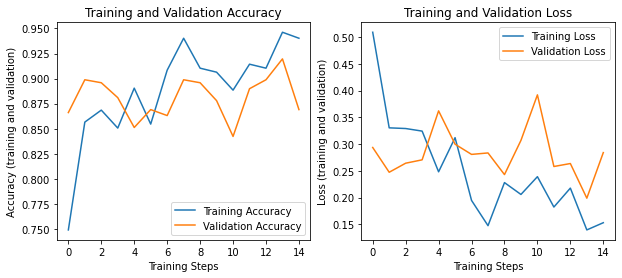

In [46]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

class: AMAZON_JEANS, confidence: 0.999950


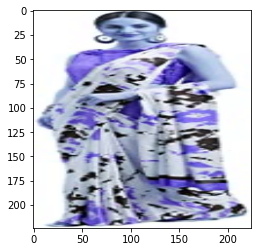

<Figure size 432x288 with 0 Axes>

class: AMAZON_TROUSERS, confidence: 0.578172


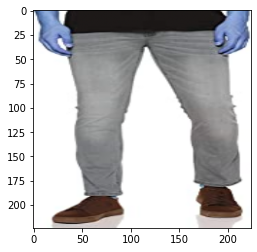

class: AMAZON_SAREE, confidence: 0.864854


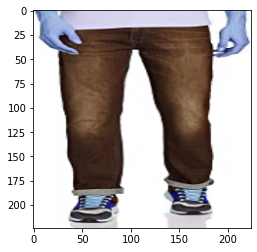

<Figure size 432x288 with 0 Axes>

class: AMAZON_SAREE, confidence: 0.582695


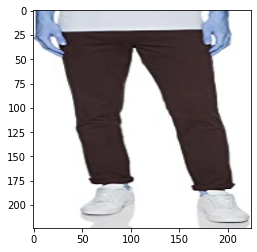

<Figure size 432x288 with 0 Axes>

class: AMAZON_SAREE, confidence: 0.863795


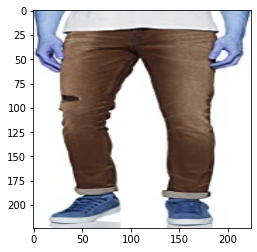

<Figure size 432x288 with 0 Axes>

class: AMAZON_SAREE, confidence: 0.716672


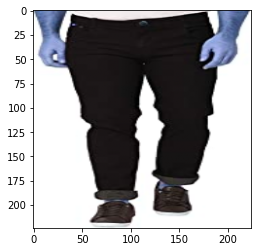

<Figure size 432x288 with 0 Axes>

class: AMAZON_TROUSERS, confidence: 0.881574


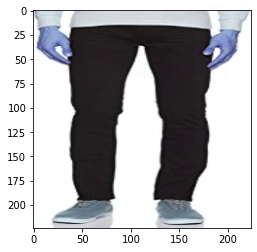

<Figure size 432x288 with 0 Axes>

class: AMAZON_TROUSERS, confidence: 0.943701


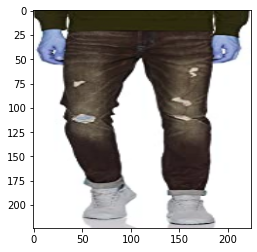

<Figure size 432x288 with 0 Axes>

class: AMAZON_SAREE, confidence: 0.942600


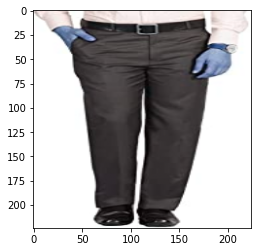

<Figure size 432x288 with 0 Axes>

class: AMAZON_TROUSERS, confidence: 0.707107


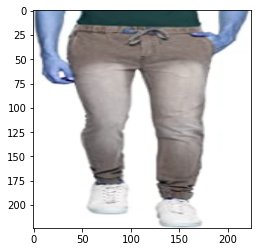

<Figure size 432x288 with 0 Axes>

class: AMAZON_TROUSERS, confidence: 0.908361


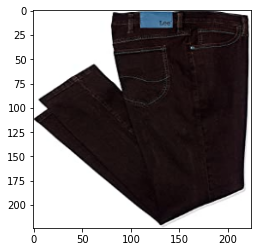

<Figure size 432x288 with 0 Axes>

class: AMAZON_SAREE, confidence: 0.980763


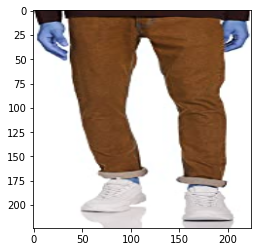

<Figure size 432x288 with 0 Axes>

class: AMAZON_JEANS, confidence: 0.999724


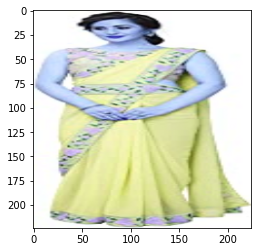

<Figure size 432x288 with 0 Axes>

class: AMAZON_SAREE, confidence: 0.752370


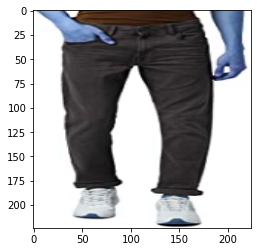

<Figure size 432x288 with 0 Axes>

class: AMAZON_SAREE, confidence: 0.985954


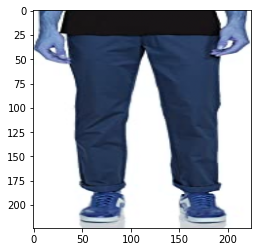

<Figure size 432x288 with 0 Axes>

class: AMAZON_JEANS, confidence: 0.999997


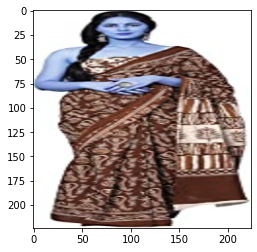

<Figure size 432x288 with 0 Axes>

In [47]:
import random
import cv2
def upload(filename):
    img = cv2.imread(os.path.join(train_dir, filename))
    img = cv2.resize(img, (224, 224) )
    img = img /255
    
    return img

def pre_result(image):
    x = model.predict(np.asarray([img]))[0]
    classx = np.argmax(x)
    
    return {Labels[classx]: x[classx]}

images = random.sample(validation_generator.filenames, 16)

for idx, filename in enumerate(images):
    
    
    img = upload(filename)
    prediction = pre_result(img)
    print("class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
predictions1 = model.predict(validation_generator, steps=len(validation_generator))
y = np.argmax(predictions1, axis=1)

print('Classification Report')
cr = classification_report(y_true=validation_generator.classes, y_pred=y, target_names=validation_generator.class_indices)
print(cr)

evaluates = model.evaluate(validation_generator)

print(evaluates)

Classification Report
                 precision    recall  f1-score   support

   AMAZON_JEANS       0.87      0.80      0.83       122
   AMAZON_SAREE       0.99      1.00      1.00       102
AMAZON_TROUSERS       0.82      0.88      0.85       120

       accuracy                           0.89       344
      macro avg       0.89      0.89      0.89       344
   weighted avg       0.89      0.89      0.89       344

22/22 [==============================] - 13s 576ms/step - loss: 0.2706 - accuracy: 0.9041
[0.2705661952495575, 0.9040697813034058]


Confusion Matrix


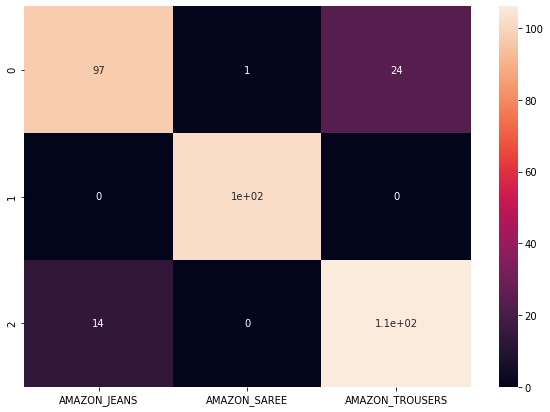

In [49]:
import pandas as pd
import numpy as np
import seaborn as sn
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y)
df = pd.DataFrame(cm, columns=validation_generator.class_indices)
plt.figure(figsize=(10,7))
sn.heatmap(df, annot=True)

In [57]:
tf.keras.models.save_model(model,'model4.hdf5')


ValueError: ignored

In [59]:
model.save("model5.hdf5")

ValueError: ignored